<h1> Research iteration 2</h1>

<i>Joël Boafo, Sjoerd Beetsma, Maarten de Jeu
Class V2A - Group 5</i>

<h2>Business Understanding</h2>

Through the business, we have been asked to examine the following questions:

<ol>
<li>With what accuracy can we decide the quality of a red-wine according to its chemical properties.</li>
<li>Can we predict a wine's color based on it's chemical properties?</li>
<li>Can we distinguish between logical clusters of wineries? (Premium, budget, high-quality, etc...)</li>
</ol>


<h2> Data Understanding: Chemical datasets.</h2>

The dataset for the first research question is aquired from https://archive.ics.uci.edu/ml/datasets/wine+quality along a dataset about red-wine there is also a dataset about white-wine lets explore both for possible research-questions in the future.

The business tells us the variables in the chemical datasets are:<br />

1 - fixed acidity <br />
2 - volatile acidity <br />
3 - citric acid <br />
4 - residual sugar <br />
5 - chlorides <br />
6 - free sulfur dioxide <br />
7 - total sulfur dioxide <br />
8 - density <br />
9 - pH <br />
10 - sulphates <br />
11 - alcohol <br />
12 - quality (score between 0 and 10, based on sensory data) <br />

The business also let us now that they don't know if all variables are relevant in deciding the quality score of a wine.

For the second research question we aquired the dataset from ...
The business told us the dataset has the following variables:

1 - country<br/>
2 - description<br/>
3 - designation<br/>
4 - points<br/>
5 - price<br/>
6 - province <br/>
7 - region_1<br/>
8 - region_2<br/>
9 - taster_name<br/>
10 - taster_twitter_handle<br/>
11 - title <br/>
12 - variety<br/>
13 - winery<br/>

We import some libraries and the dataset to examine the data through code.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn import cluster
from sklearn.model_selection import train_test_split

import plotly.express as px

import py_lib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Load in both red and white wine datasets

In [2]:
dataset_red = pd.read_csv("datasets/winequality-red.csv", sep=";")
dataset_white = pd.read_csv("datasets/winequality-white.csv", sep=";")

Lets take the head of one of the chemical property datasets to have a first look at the submissions of the data.

In [3]:
dataset_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As described by the business each row seems to correspond with a individual wine with eleven different columns describing chemical properties and one column which represents the quality score of the wine.

Lets see howmuch raw-data we have through the shapes of the datasets before we do any more exploration.

In [4]:
red_rows, red_columns = dataset_red.shape
white_rows, white_columns = dataset_white.shape

print(f'The red-wine quality dataset contains {red_rows} rows and {red_columns} columns')
print(f'The white-wine quality dataset contains {white_rows} rows and {white_columns} columns')

The red-wine quality dataset contains 1599 rows and 12 columns
The white-wine quality dataset contains 4898 rows and 12 columns


Lets change the column name white spaces to underscores to make life easier.

In [5]:
dataset_red.columns = dataset_red.columns.str.replace(' ','_')
dataset_white.columns = dataset_white.columns.str.replace(' ','_')

dataset_red.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


<h3>Target and feature variables</h3>

All the columns describing chemical properties will be considered as a feature variable and the column quality represents the target variable, the variable we want to predict.
Lets safe them in a variables for later use.

In [6]:
feature_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
target_var = 'quality'

All the columns describing the origin of the wine and the category will be considered as a feature variable. The column 'points' represents the target variable we want to predict.
We will also store them in variables

<h3> Scales of measurements </h3>

To choose a appropiate model for our research-questions and available data it's necessary to have a understanding of all the scales of measurements for the target and feature variables.

In [7]:
nomi, disc, ordi, cont = 'Nominal', 'Discrete', 'Ordinal','Continous'
print('Scales of measurement chemical properties datasets')
pd.DataFrame(index=dataset_red.columns, data=[cont for i in range(11)] + [disc], columns=['Scale_of_measurement'])

Scales of measurement chemical properties datasets


,Scale_of_measurement
fixed_acidity,Continous
volatile_acidity,Continous
citric_acid,Continous
residual_sugar,Continous
chlorides,Continous
free_sulfur_dioxide,Continous
total_sulfur_dioxide,Continous
density,Continous
pH,Continous
sulphates,Continous


As can be seen all the chemical properties (feature variables) have continous scale of measurement and the target variable, quality has a Discrete scale of measurement.

<h3>Central tendancies and dispersion measures</h3>

From the central tendancies and dispersion measures we can see some useful statistics about the target and feature variables.

In [8]:
dataset_red.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


From the describe we can tell that there are quite a few columns with a big difference between maximum and minimum values which indicate outliers.

The columns with big differences between max and min values:
Residual_sugar, chlorides, free_sulfur_dioxide ,total_sulfur_dioxide.

In [9]:
dataset_white.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


Just like the red-wine dataset, the white-wine dataset has similair differences in maximum and minimum values.

<h3>Distribution of data</h3>


Lets take a more visual look at the distribution of all data through a histogram for each of the feature and target attributes.

Starting off with the red wine dataset

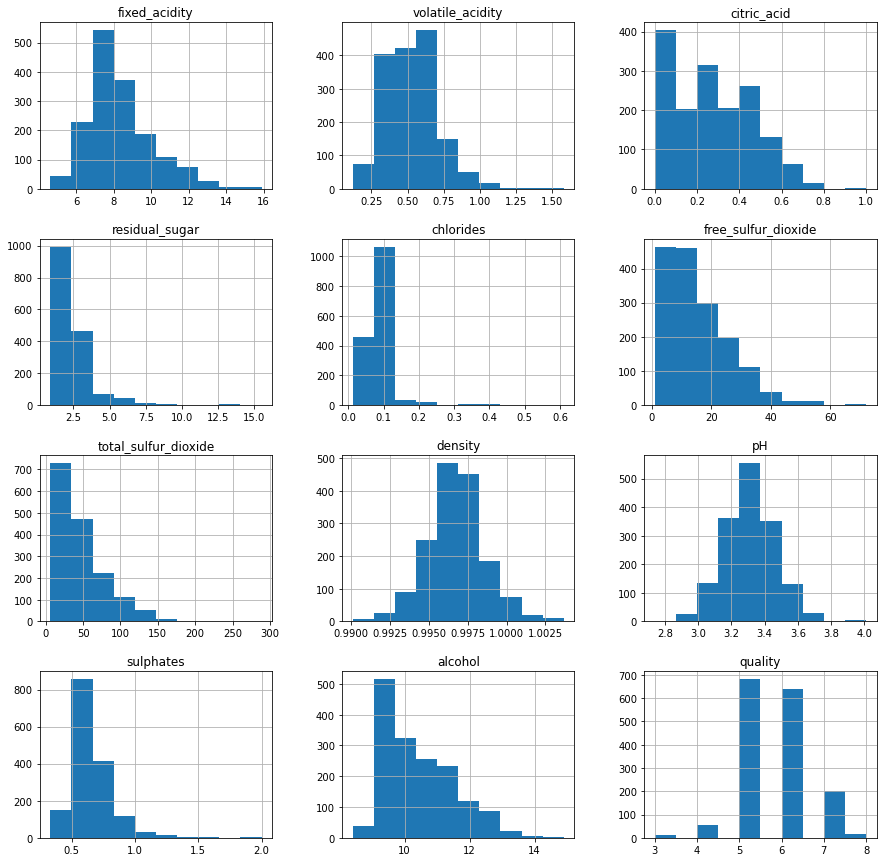

In [10]:
dataset_red.hist(figsize=(15,15))
plt.show()  #FIXME(m-jeu): Is this necessary, because the visualization is through a pandas method?

Moving on to the white wine dataset:

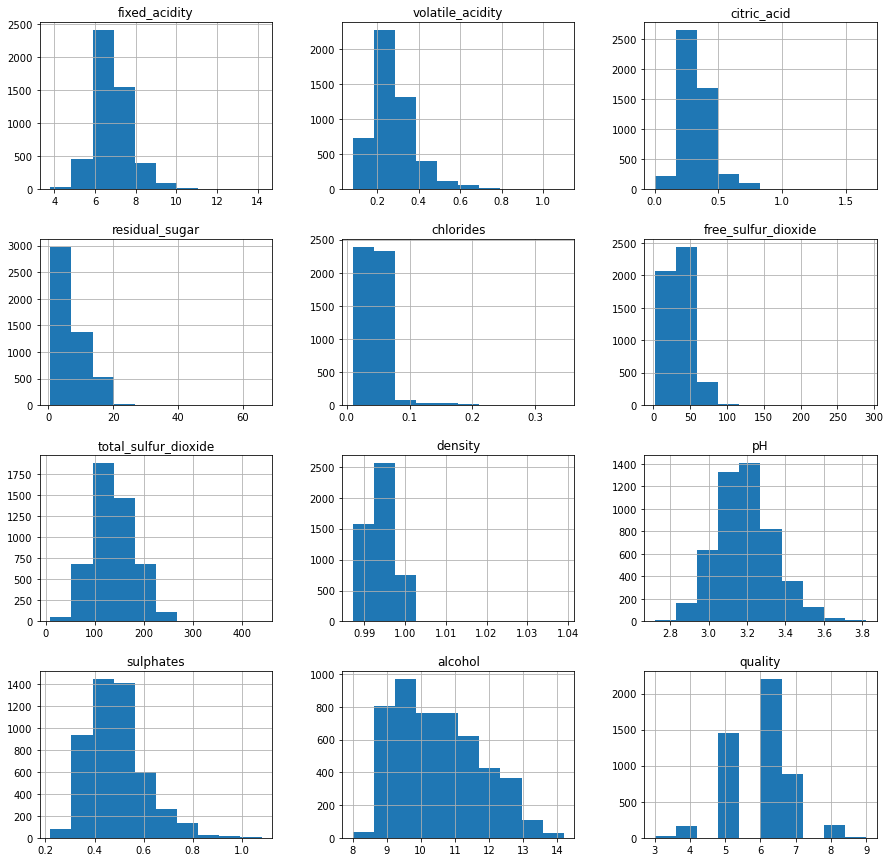

In [11]:
dataset_white.hist(figsize=(15,15))
plt.show()  #FIXME(m-jeu): Is this necessary, because the visualization is through a pandas method?

As can been seen in the tables above the quality scores for the red wines range between 3 and 8 with wines with a score of 5 being the most common.
The white wines range within a quality of 3 and 9 with the score of 6 being most common.

<h3>Outliers</h3>

To get a visual understanding of the outliers in the feature columns each feature gets a boxplotted with the target variable points. Giving a small summary of the minimum, Q1, Q2 (median), Q3 and the maximum of each attribute plotted against points scored to give a view of outliers at all quality levels.

In [12]:
def boxplotter(dataset, y_axes, x_axis):
    """Function to boxplot 1 x_axis against a list of y_axis of a given dataset"""
    for col in y_axes:
        sns.boxplot(x=dataset[x_axis], y=dataset[col])
        plt.show()

First boxplot all the feature variables against the target variable of the red-wine dataset

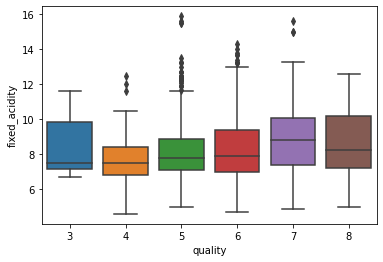

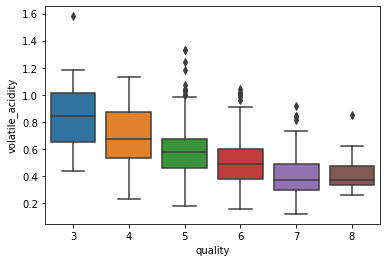

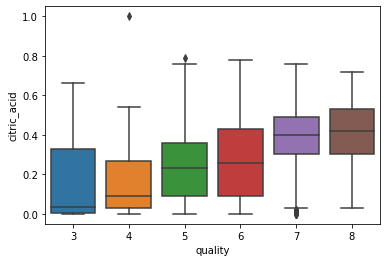

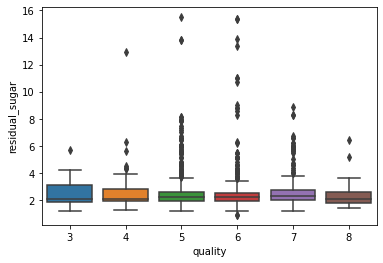

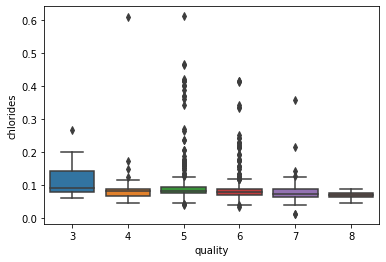

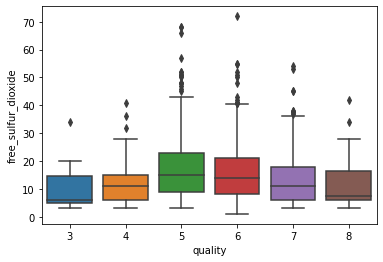

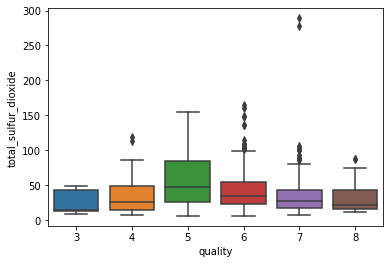

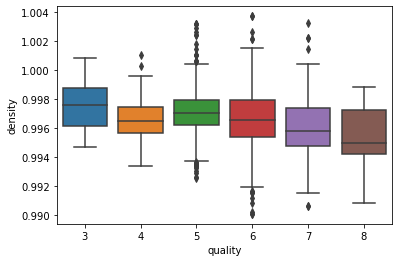

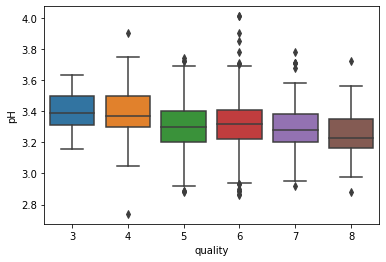

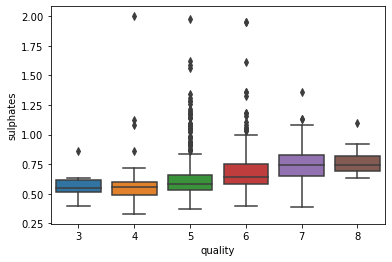

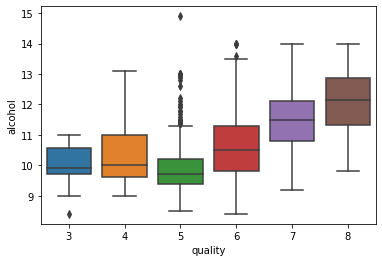

In [13]:
boxplotter(dataset=dataset_red, y_axes=feature_vars, x_axis=target_var)

Now do the same for the white-wine dataset

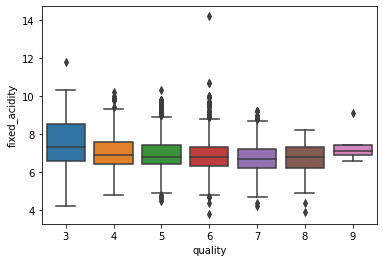

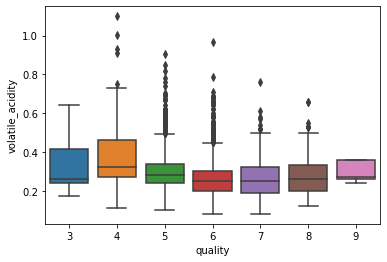

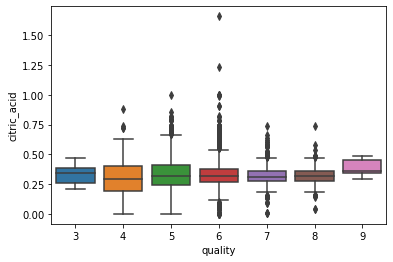

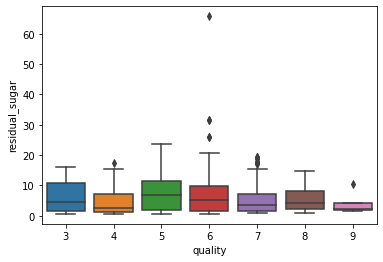

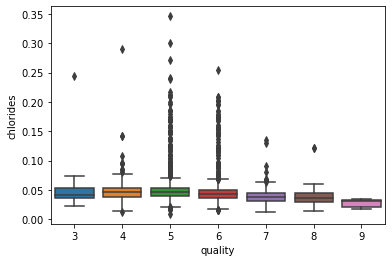

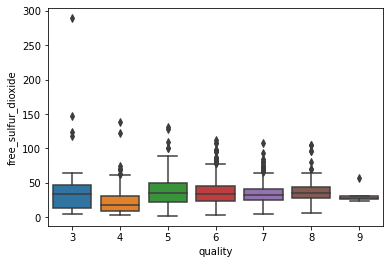

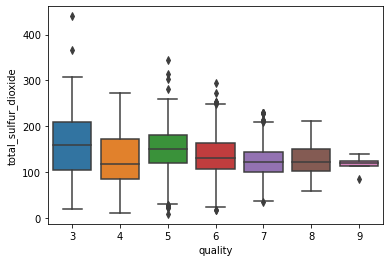

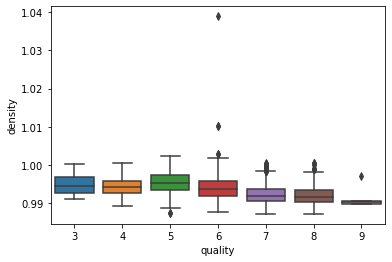

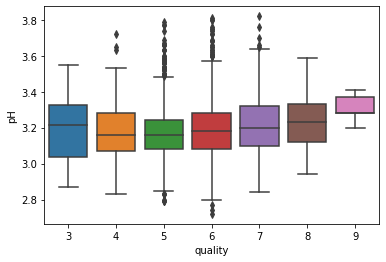

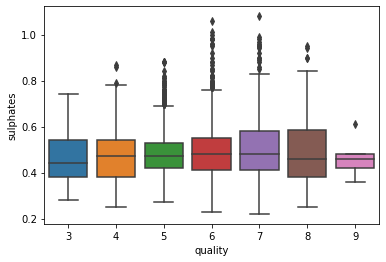

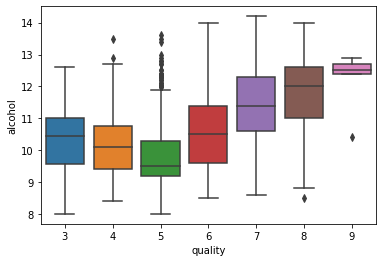

In [14]:
boxplotter(dataset=dataset_white, y_axes=feature_vars, x_axis=target_var)



As can be seen from the boxplots all of our current variables contain outliers.

All outliers in the above boxplots seem to be plausible and not from incorrect data.
From the boxplot with alcohol on the y axis and quality on the x axis we can  see that a trend of a rising median alcohol percentage the higher the quality of the wine.

<h3>Correlations</h3>

To help find correlations between variables and indepented/undepented attributes we can make use of a correlation matrix. 

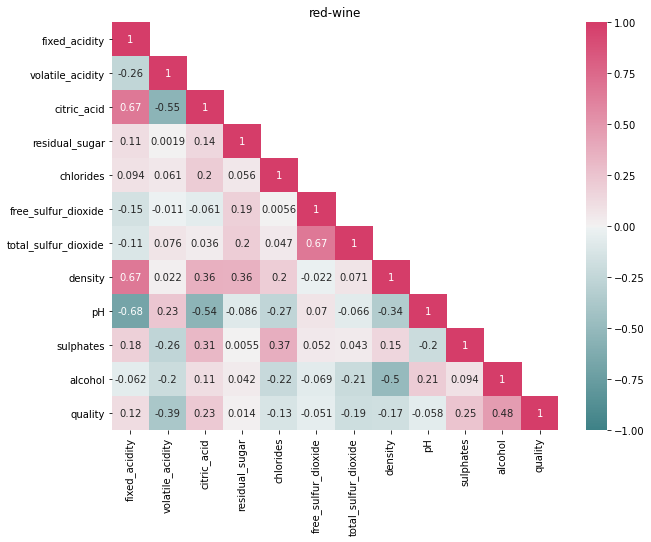

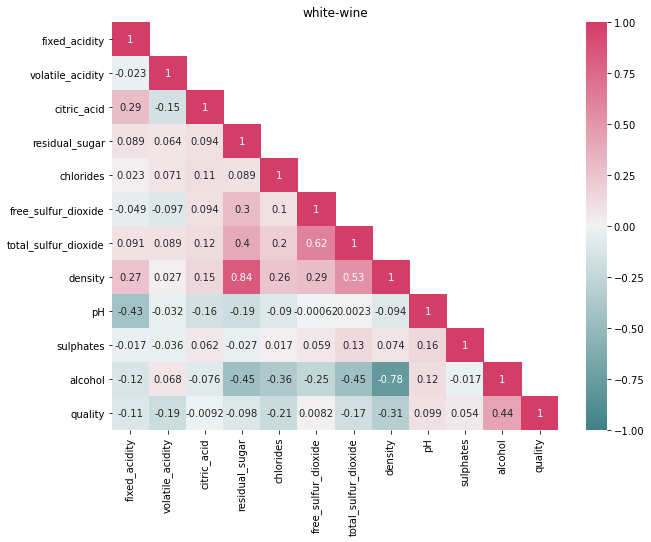

In [15]:
def corr_matrix_plotter(dataset, title=''):
    """Return a correlation matrix created using seaborn and matplotlib that for all columns in
    a pandas dataframe.

    Args:
        dataset: Dataset to construct correlation matrix for.
        title: Title of the plot.

    Returns:
        correlation matrix."""
    corr = dataset.corr()
    plt.figure(figsize=(10,7.5))
    cmap = sns.diverging_palette(200, 0, as_cmap=True) # color palette as cmap
    mask = np.logical_not(np.tril(np.ones_like(corr))) # triangle mask
    sns.heatmap(corr, annot=True, mask=mask, cmap = cmap, vmin=-1, vmax=1).set_title(title) # correlation heatmap
    plt.show()
corr_matrix_plotter(dataset_red, 'red-wine')
corr_matrix_plotter(dataset_white, 'white-wine')

In the correlation matrices graphed above you can see which attributes have a correlation to other attributes. Starting with our target variable 'quality', we can see quality has a few correlations with the strongest one being alcohol for both red and white wines and a few weaker ones like volatile acidity, sulphates and citric acid for red wines and density and chloride for white wines. Because quality is our target variable it's the indepented attribute in the correlations.

Besides there are some corelations among chemical properties:
Fixed acidity has strong correlation with pH, but it’s still an independent type. pH However is a dependent type; it depends on the former. Volatile acidity, residual sugar, sulphates, chlorides, and density are all independent data types. Total sulfur dioxide is dependent on free sulfur dioxide, but free sulfur dioxide is independent.

<h3>Data Preparation: Chemical dataset.</h3>

Lets start of the data preparation by checking the datatypes and clean or change them if necessary.

Red-wine quality datatypes:

In [16]:
dataset_red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

White-wine quality datatypes:

In [17]:
dataset_white.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We can now move on to checking and removing any NA values in the datasets.

In [18]:
pd.isna(dataset_red).sum().sum() # checking for total NA values in red_wine

0

In [19]:
pd.isna(dataset_white).sum().sum() # checking for total NA values in white_wine

0

<h4>Removing outliers</h4>
A remove outliers function is created but currently not used because for linear regression we want to keep the outliers.
Lets start of by removing all extreme the outliers leaving the mild ones in the dataset with a outer fence:

In [20]:
def remove_outliers(dataset, fence = 3):
    q1 = dataset.quantile(.25)
    q3 = dataset.quantile(.75)
    iqr = q3 - q1
    return dataset[(dataset >= q1 - (fence * iqr)) & (dataset <= q3 + (fence * iqr))].dropna() # turn extreme outliers into NaN values and drop the rows

The red-wine dataset contained 1599 rows and the white-wine 4898 before removing the outliers lets remove the outliers and check howmany are left.

In [21]:
dataset_red = remove_outliers(dataset_red)
dataset_white = remove_outliers(dataset_white)

In [22]:
dataset_red.shape, dataset_white.shape

((1435, 12), (4690, 12))

There are still 1435 rows left which means 12% of the columns contained outliers. With 88% still left there will be enough data to construct a model. 
There is roughly still 88% of the red-wine data left and 96% of the white-wine data after removing the extreme outliers that lay 3+ IQR above Q3 or 3+ IQR below Q1.

<h3>Normalizing data</h3>

Many algorithms used for making a prediction model work more efficient with normalized data. We can normalize the whole dataset into a new dataframe to acces normalized data from.

In [23]:
def normalizer(dataset):
    scaler = sk.preprocessing.StandardScaler().fit(dataset)
    return pd.DataFrame((scaler.transform(dataset)), columns=dataset.columns)

In [24]:
normalized_dataset_red = normalizer(dataset_red)
normalized_dataset_white = normalizer(dataset_white)

In [25]:
normalized_dataset_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.525165,0.990227,-1.375751,-0.624624,-0.200565,-0.475071,-0.358996,0.655068,1.285460,-0.612244,-0.984588,-0.809014
1,-0.290377,2.008930,-1.375751,0.554987,1.138089,0.949540,0.724583,0.099719,-0.800851,0.287086,-0.605159,-0.809014
2,-0.290377,1.329795,-1.164911,0.049439,0.773002,-0.068040,0.297718,0.210789,-0.397049,0.062253,-0.605159,-0.809014
3,1.705324,-1.386744,1.576012,-0.624624,-0.261413,0.135476,0.494732,0.766138,-1.070052,-0.462355,-0.605159,0.447409
4,-0.525165,0.990227,-1.375751,-0.624624,-0.200565,-0.475071,-0.358996,0.655068,1.285460,-0.612244,-0.984588,-0.809014


<h4>Data cleaned</h4>

The red and white wine chemicalproperty datasets got cleaned by removing all extreme outliers in the datasets and creating a normalized copy of both datasets.

<h3>Modeling: Chemical datasets</h3>

<h4>Test and train data</h4>


The datasets will be splitted into a train and test dataset for the models to learn and test their performance.

In [26]:
X_red, y_red = dataset_red[feature_vars], dataset_red[target_var]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, random_state=0)

<h4>Baseline model</h4>

A baseline model is constructed to compared future models against. The baseline model always predicts the mean of the target variable.

In [27]:
baseline_red = py_lib.DumbRegressor(y_red)

In [28]:
base_line_predictions_red = baseline_red.predict(X_test_red)

Lets check the root mean squared error to check the accuracy

In [29]:
sk.metrics.mean_squared_error(y_test_red, base_line_predictions_red)

0.6416774071674407

Plotting the predicted value (a constant) and the actual values. 

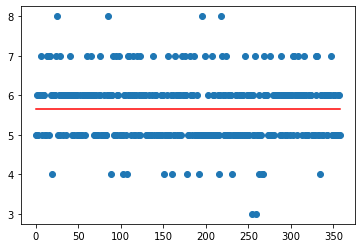

In [30]:
plt.plot(base_line_predictions_red, c='r')
plt.scatter(x=np.arange(len(X_test_red)), y=y_test_red)
plt.show()

<h4>Implementing a machine learning model</h4>

For the first version of the machine learning model both linear regression and polynomial regression will be tested.

Making the pipelines

<h4>Hyper-parameters</h4>

In [31]:
regr = make_pipeline(linear_model.LinearRegression())
poly = make_pipeline(PolynomialFeatures(polynomials),linear_model.LinearRegression())

NameError: name 'polynomials' is not defined

Fit the model to the X train and y train data

In [ ]:
regr.fit(X_train_red, y_train_red)
poly.fit(X_train_red, y_train_red)

predict the y value of the X test set

In [ ]:
y_predictions_red_lin = regr.predict(X_test_red)
y_predictions_red_poly = poly.predict(X_test_red)

Get the mean_squared_error to see how good the prediction is vs the actual values.

In [ ]:
lin_RMSE = sk.metrics.mean_squared_error(y_test_red, y_predictions_red_lin)
poly_RMSE = sk.metrics.mean_squared_error(y_test_red, y_predictions_red_poly)
print(f"RMSE linear model {lin_RMSE} RMSE multi-polynomial model {poly_RMSE}")

Scatterplot of the two most correlating columns and the predicted values

In [ ]:
px.scatter_3d(x=X_test_red['alcohol'], y=X_test_red['sulphates'], z=y_predictions_red_lin)

Scatterplot of the two most correlating columns and the actual values

In [ ]:
px.scatter_3d(x=X_test_red['alcohol'], y=X_test_red['sulphates'], z=y_test_red)

<h3>Conclusion first model</h3>

Conclusion to be added. First model requires more tuning and adjusting before a final conclusion

<h3>Research question 3</h3>


<h2> Business understanding </h2>

For our third research question we got a dataset about winereviews from different sommeliers with information about the origin of the wine, price and their review.
<br/>
With our research question being:
<li>Can we distinguish between logical clusters of wineries? (Premium, budget, high-quality, etc...)</li>

<h2> Data Understanding Wine-review dataset.</h2>


We'll be using the review Dataset for research question 3, so that needs to be examined as well.

From our dataset's source ... we got a list of the different attributes:

1 - country<br/>
2 - description<br/>
3 - designation<br/>
4 - points<br/>
5 - price<br/>
6 - province <br/>
7 - region_1<br/>
8 - region_2<br/>
9 - taster_name<br/>
10 - taster_twitter_handle<br/>
11 - title <br/>
12 - variety<br/>
13 - winery<br/>


In [32]:
dataset_reviews = pd.read_csv("datasets/winemag-data-130k-v2.csv")
dataset_reviews.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


At first look it appears most of the (usable) variables are nominal, with points and price as the only numerical (discrete) values. We have some columns that initially seem fairly useless for the types of analysis that we will most probably be using for this project, like 'description', but we'll keep them just in case we end up doing anything like a sentiment-analysis type model. It also appears we have a redundant index columns called "Unnamed: 0".

<h4>Target and feature variables</h4>

We're not quite sure what feature variables we'll be using for the third question, but we know we'll be grouping by 'winery'. We'll start out by using 'price' and 'points' as further feature variables, but during the modelling stage we might end up using more.

Considering we're looking for logical clusters (unsupervised learning), there are no target variables.

<h4>Scales of measurement</h4>

Like mentioned earlier, we're mostly dealing with categorical (ordinal, specifically) variables in this dataset. There are 2 numerical values. Points and price are both discrete values.

<h4>Central tendencies and dispersion measures</h4>

We can examine the spread of values of the numerical variables through histograms:

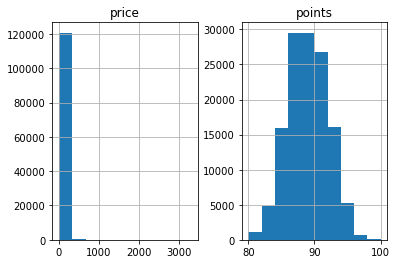

In [33]:
_ = dataset_reviews[["price", "points"]].hist()  # _ = to prevent pointless table from showing on screen.

Points has an obvious Gaussian distribution. It does appear the price graph is made quite unreadable by some outliers. We'll have a proper look at those later, let's ignore them for now to have a better look at the distribution.

<AxesSubplot:>

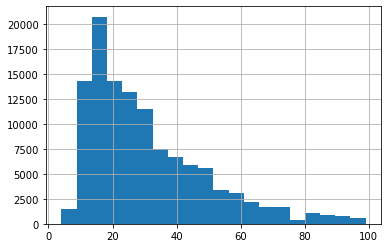

In [34]:
dataset_reviews[dataset_reviews["price"] < 100]["price"].hist(bins=20)

It appears that the price column in lognormally distributed.

<h4>Outliers</h4>

Because we won't be comparing against something, we'll be using a seperate way of creating boxplots to explore outliers for the numeric values.

<AxesSubplot:>

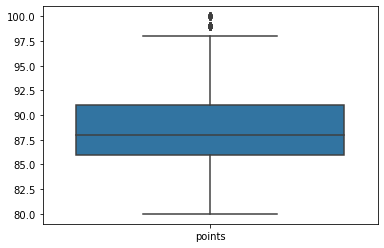

In [35]:
sns.boxplot(data=dataset_reviews[["points"]])

It appears the median' amount of points is around 88, and quite symmetric. There are a couple of outliers around 100, but nothing extreme.

<AxesSubplot:>

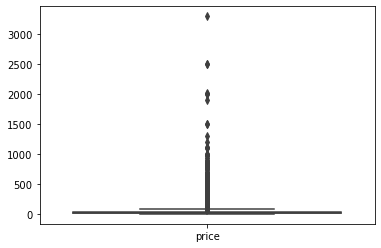

In [36]:
sns.boxplot(data=dataset_reviews[["price"]])

The boxplot for price is barely a boxplot because of all the outliers. Like we already noticed with the histogram, most measurements fall within the 0-100 range, but there are some extremely high outliers. For data exploration, we'll create a separate column with the outliers removed for price.

In [37]:
dataset_reviews["price_no_outliers"] = remove_outliers(dataset_reviews["price"])  # FIXME(m-jeu): remove_outliers drops na
dataset_reviews["points_no_outliers"] = remove_outliers(dataset_reviews["points"])# Which then get filled in again...

<h3>Correlations</h3>

We'll use the pearson correlation coefficient to see if there's a linear correlation between the only 2 numerical columns in the dataset. Because of the extreme outliers in price, it might be sensible to also check this with the outliers removed.

In [38]:
dataset_reviews[["points", "price"]].corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


In [39]:
dataset_reviews[["points_no_outliers", "price_no_outliers"]].corr()

,points_no_outliers,price_no_outliers
points_no_outliers,1.000000,0.549194
price_no_outliers,0.549194,1.000000


It appears there is a weak linear correlation between price and points, when disregarding outliers. Because we're looking for cluster, this is not terribly relevant, but still noteworthy.

<h2>Data preparation: Review dataset</h2>

Having explored the data, we're ready to clean it up. We have already separated the outliers in a separate column in the dataset, because that couldn't wait until data preparation. First, let's get rid of the unnamed index column, because that's not useful in any way.

In [40]:
dataset_reviews.drop("Unnamed: 0", axis=1, inplace=True)
dataset_reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
price_no_outliers        float64
points_no_outliers         int64
dtype: object

And let's change the categorical values from 'object', to 'string', to 'category'.

In [41]:
dataset_reviews = dataset_reviews.convert_dtypes()
dataset_reviews[["country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]] = dataset_reviews[["country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]].astype("category")  # FIXME(m-jeu): This can probably be written shorter.
dataset_reviews.dtypes

country                  category
description              category
designation              category
points                      Int64
price                       Int64
province                 category
region_1                 category
region_2                 category
taster_name              category
taster_twitter_handle    category
title                    category
variety                  category
winery                   category
price_no_outliers           Int64
points_no_outliers          Int64
dtype: object

<h2>Modelling: Review dataset</h2>

Our goal is to find logical clusters for different types of wineries, using a clustering algorithm. First, we create a separate dataframe from the original dataframe grouped by winery, with the mean value of the point/price value of that winery's wine as columns.

In [42]:
dataset_winery = dataset_reviews.groupby("winery")[["price_no_outliers", "points_no_outliers"]].mean()
dataset_winery.dropna(inplace=True)
dataset_winery

,price_no_outliers,points_no_outliers
winery,,
1+1=3,18.333333,86.666667
10 Knots,24.75,83.25
100 Percent Wine,18.0,86.333333
1000 Stories,19.0,90.5
1070 Green,25.0,88.0
...,...,...
Órale,30.0,91.0
Öko,11.0,85.0
Ökonomierat Rebholz,58.25,91.5


For many clustering algorithms, it's useful to have the data normalized as well. Let's do that in seperate columns.

In [43]:
def normalize(s: pd.Series) -> pd.Series:
    """Normalize a pandas series object by subtracting the mean and dividing by the
    standard deviation.

    Args:
        s: series object to normalize.

    Returns:
        normalized series object."""
    return (s - np.mean(s)) / np.std(s)

dataset_winery["price_normalized"] = normalize(dataset_winery["price_no_outliers"])
dataset_winery["points_normalized"] = normalize(dataset_winery["points_no_outliers"])

Let's have a look at the data:

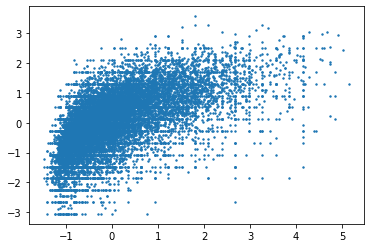

In [44]:
plt.scatter(dataset_winery["price_normalized"], dataset_winery["points_normalized"], s=2)

So far, it mostly just looks like a thick cloud. Hopefully, a clustering algorithm will be able to see through the fog and give us more insight.

We'll start out by using kMeans on the (normalised) points and price because of it's simplicity, and move onto using more complex models and/or adding more data in case it doesn't give any useful results.
Even though it's doubtful anything with k > 20 will be useful, we'll still try everything from k=2 to k=30, to see how the model behaves.

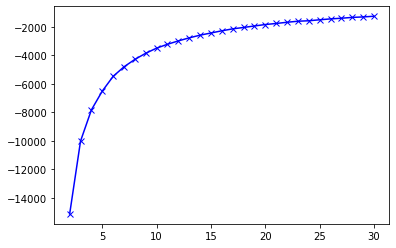

In [45]:
#c1 for clustering attempt 1
c1_k = np.arange(2, 31)  # Values for k to try out.
c1_make_train_km_model = np.vectorize(lambda k: cluster.KMeans().set_params(n_clusters=k, random_state=0).fit(dataset_winery[["price_normalized", "points_normalized"]]))  # FIXME(m-jeu): Unreadable!
c1_models = c1_make_train_km_model(c1_k)
c1_models_scores = np.vectorize(lambda m: m.score(dataset_winery[["price_normalized", "points_normalized"]]))(c1_models)  #FIXME(m-jeu): Unreadable?
plt.plot(c1_k, c1_models_scores, 'bx-')

Considering the fact there's no clear 'elbow' in the elbow plot, and no clear clusters in the previously constructed graph, it doesn't look very promising. We can look at a visualization at k=6
of the result to confirm:

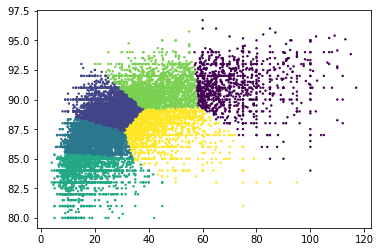

In [46]:
c1_final_model = c1_models[4]  # Take it out of array for convenience.
c1_predictions = c1_final_model.predict(dataset_winery[["price_normalized", "points_normalized"]])
plt.scatter(dataset_winery["price_no_outliers"], dataset_winery["points_no_outliers"], c=c1_predictions, s=2)

Like we expected, not very useful. It's doubtful another algorithm would be able to make sense out of that cloud, so the way to go is probably to attempt to use the curse of dimensionality to our advantage.
There is one problem: there isn't much numerical data available to use in our models. All the categorical values in the dataset are nominal, so that would mean using a get_dummies() construction to turn them into useful data. Unfortunately, all the nominal variables have too many permutations to realistically use, so we'll have to get creative.

In interesting metric could be the amount of wine reviews listed for a single winery. We'll create a new grouped by dataframe, with this column added, normalize it's columns, and visualize it.

In [47]:
dataset_reviews["winery"].value_counts()

Wines & Winemakers          222
Testarossa                  218
DFJ Vinhos                  215
Williams Selyem             211
Louis Latour                199
                           ... 
Clos Dady                     1
Clos Fardet                   1
Clos Junet                    1
Clos Larcis                   1
Hayward by Folin Cellars      1
Name: winery, Length: 16757, dtype: int64

In [48]:
dataset_winery_2 = dataset_reviews.groupby("winery").agg({"price_no_outliers": np.mean,
                                                          "points_no_outliers": np.mean,
                                                          "title": lambda np_a: np_a.size})  # Title is a random column
                                                                                             # Doesn't really matter what column
                                                                                             # We pick here

dataset_winery_2.head(5)

,price_no_outliers,points_no_outliers,title
winery,,,
1+1=3,18.333333,86.666667,6
10 Knots,24.75,83.25,4
100 Percent Wine,18.0,86.333333,3
1000 Stories,19.0,90.5,2
1070 Green,25.0,88.0,1


In [49]:
dataset_winery_2["price_normalized"] = normalize(dataset_winery_2["price_no_outliers"])
dataset_winery_2["points_normalized"] = normalize(dataset_winery_2["points_no_outliers"])
dataset_winery_2["reviews_normalized"] = normalize(dataset_winery_2["title"])
dataset_winery_2.dropna(inplace=True)

In [61]:
fig = px.scatter_3d(data_frame=dataset_winery_2,
              x='price_normalized',
              y='points_normalized',
              z='reviews_normalized')

fig.update_traces(marker={'size': 1, 'colorscale': 'Viridis', 'opacity': 0.8})

It doesn't seem like this is going anywhere. TODO(m-jeu): Ask Rick